In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x,y):
    return x + 2*y

In [3]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [4]:
t = np.linspace(0.,4.,100)

In [5]:
y0=0

In [6]:
yext = Solucion(t)

In [7]:
def RungeKutta_4(f, x, y0):
    
    h = x[1] - x[0]
    y = np.zeros_like(x)
    y[0] = y0
    
    for i in range(1,len(x)):
        k1 = h * f(x[i-1], y[i-1])
        k2 = h * f(x[i-1] + 0.5 * h, y[i-1] + 0.5 * k1)
        k3 = h * f(x[i-1] + 0.5 * h, y[i-1] + 0.5 * k2)
        k4 = h * f(x[i-1] + h, y[i-1] + k3)
        
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return y

In [8]:
yrk4 = RungeKutta_4(f,t,y0)

In [9]:
print(yrk4)

[0.00000000e+00 8.38673759e-04 3.44819073e-03 7.97758999e-03
 1.45884542e-02 2.34559651e-02 3.47700485e-02 4.87366146e-02
 6.55789038e-02 8.55389450e-02 1.08879137e-01 1.35883962e-01
 1.66861846e-01 2.02147173e-01 2.42102469e-01 2.87120772e-01
 3.37628199e-01 3.94086729e-01 4.56997223e-01 5.26902697e-01
 6.04391869e-01 6.90103002e-01 7.84728080e-01 8.89017325e-01
 1.00378410e+00 1.12991023e+00 1.26835173e+00 1.42014512e+00
 1.58641412e+00 1.76837703e+00 1.96735471e+00 2.18477916e+00
 2.42220292e+00 2.68130917e+00 2.96392278e+00 3.27202220e+00
 3.60775238e+00 3.97343880e+00 4.37160266e+00 4.80497736e+00
 5.27652633e+00 5.78946243e+00 6.34726892e+00 6.95372220e+00
 7.61291653e+00 8.32929075e+00 9.10765727e+00 9.95323354e+00
 1.08716761e+01 1.18691176e+01 1.29522068e+01 1.41281521e+01
 1.54047684e+01 1.67905286e+01 1.82946184e+01 1.99269969e+01
 2.16984611e+01 2.36207170e+01 2.57064555e+01 2.79694358e+01
 3.04245750e+01 3.30880459e+01 3.59773821e+01 3.91115931e+01
 4.25112883e+01 4.619881

In [29]:
def GetAdams(f,x,yrk4):
    
    h = x[1] - x[0]
    
    y = yrk4.copy()
    
    yc = y.copy()
    
    for i in range(5,len(x)):
        
        y[i] = y[i-1] + (h/720)*((1901)*f(x[i-1],y[i-1]) - (2774)*f(x[i-2],y[i-2])+(2616)*f(x[i-3],y[i-3])-(1274)*f(x[i-4],y[i-4])+(251)*f(x[i-5],y[i-5]))
        
        yc[i] = y[i]
        
        yc[i] = yc[i-1] + (h/1440)*((475)*f(x[i],y[i])+(1427)*f(x[i-1],y[i-1]) - (798)*f(x[i-2],y[i-2])+(482)*f(x[i-3],y[i-3])-(173)*f(x[i-4],y[i-4])+(27)*f(x[i-5],y[i-5]))
    
    return yc

In [51]:
ymoulton2 = GetAdams(f,t,yrk4)
diferencia_y=np.abs(ymoulton2-yext)

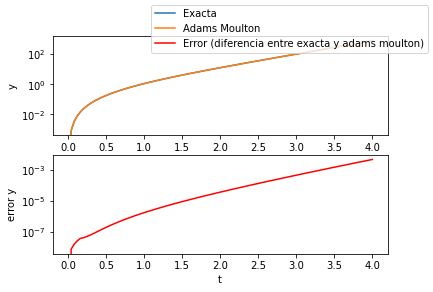

In [63]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax1= fig.add_subplot(2,1,2)

ax.set_yscale('log')
ax1.set_yscale('log')

ax.set_ylabel('y')
ax1.set_ylabel('error y')

ax.plot(t,yext,label='Exacta')
ax.plot(t,ymoulton2,label='Adams Moulton')
ax1.plot(t,diferencia_y,color='r',label="Error (diferencia entre exacta y adams moulton)")

plt.xlabel("t")
fig.legend()